In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Q1a

In [2]:
def findR(xn1, xn2):
    return xn2/(xn1*(1-xn1))

xns = [0.1, 0.23, 0.47, 0.65]
rvalues = []

for i in range(len(xns)-1):
    rvalues.append(findR(xns[i],xns[i+1]))

r = np.mean(rvalues)
print(f'Value of r is {r}')

Value of r is 2.6062724148528695


# Q1b

In [3]:
class CroppedPlot:
    def __init__(self,
        logistic: callable,
        min_r: float,
        max_r: float,
        min_x_n: float,
        max_x_n: float
    ):
        self.r_values = np.linspace(min_r,max_r, 10_000) #10_000 R values between 0.5 and 5
        self.min_x_n = min_x_n
        self.max_x_n = max_x_n

        self._logistic = logistic

    def _relation(self,r,x):
        return r*np.cos(x) - np.sin(x)


    def get_data(self, iteration: int) -> tuple:
        x_n_values = []
        r_values = []
        for r in self.r_values:
            x_n = self._logistic(r, np.random.random())
            if self.min_x_n < x_n < self.max_x_n:
                x_n_values.append(x_n)
                r_values.append(r)
            for i in range(iteration):
                x_n = self._logistic(r, x_n)
                if self.min_x_n < x_n < self.max_x_n:
                    x_n_values.append(x_n)
                    r_values.append(r)

        return r_values, x_n_values


In [4]:

def relation(r,x):
    return r*np.cos(x) - np.sin(x)

cropped_plot_1 = CroppedPlot(        
        logistic=relation,
        min_r=0.5,
        max_r=5,
        min_x_n=float("-inf"),
        max_x_n=float("inf")
    )

cropped_plot_2 = CroppedPlot(        
        logistic=relation,
        min_r=1.45,
        max_r=2.25,
        min_x_n=-0.5,
        max_x_n=2.5
    )

cropped_plot_3 = CroppedPlot(        
        logistic=relation,
        min_r=1.61,
        max_r=1.75,
        min_x_n=1.35,
        max_x_n=2.5
    )

cropped_plot_4 = CroppedPlot(        
        logistic=relation,
        min_r=1.641,
        max_r=1.665,
        min_x_n=1.85,
        max_x_n=2
    )


cropped_plots = [
    [cropped_plot_1, cropped_plot_2],
    [cropped_plot_3, cropped_plot_4]
]

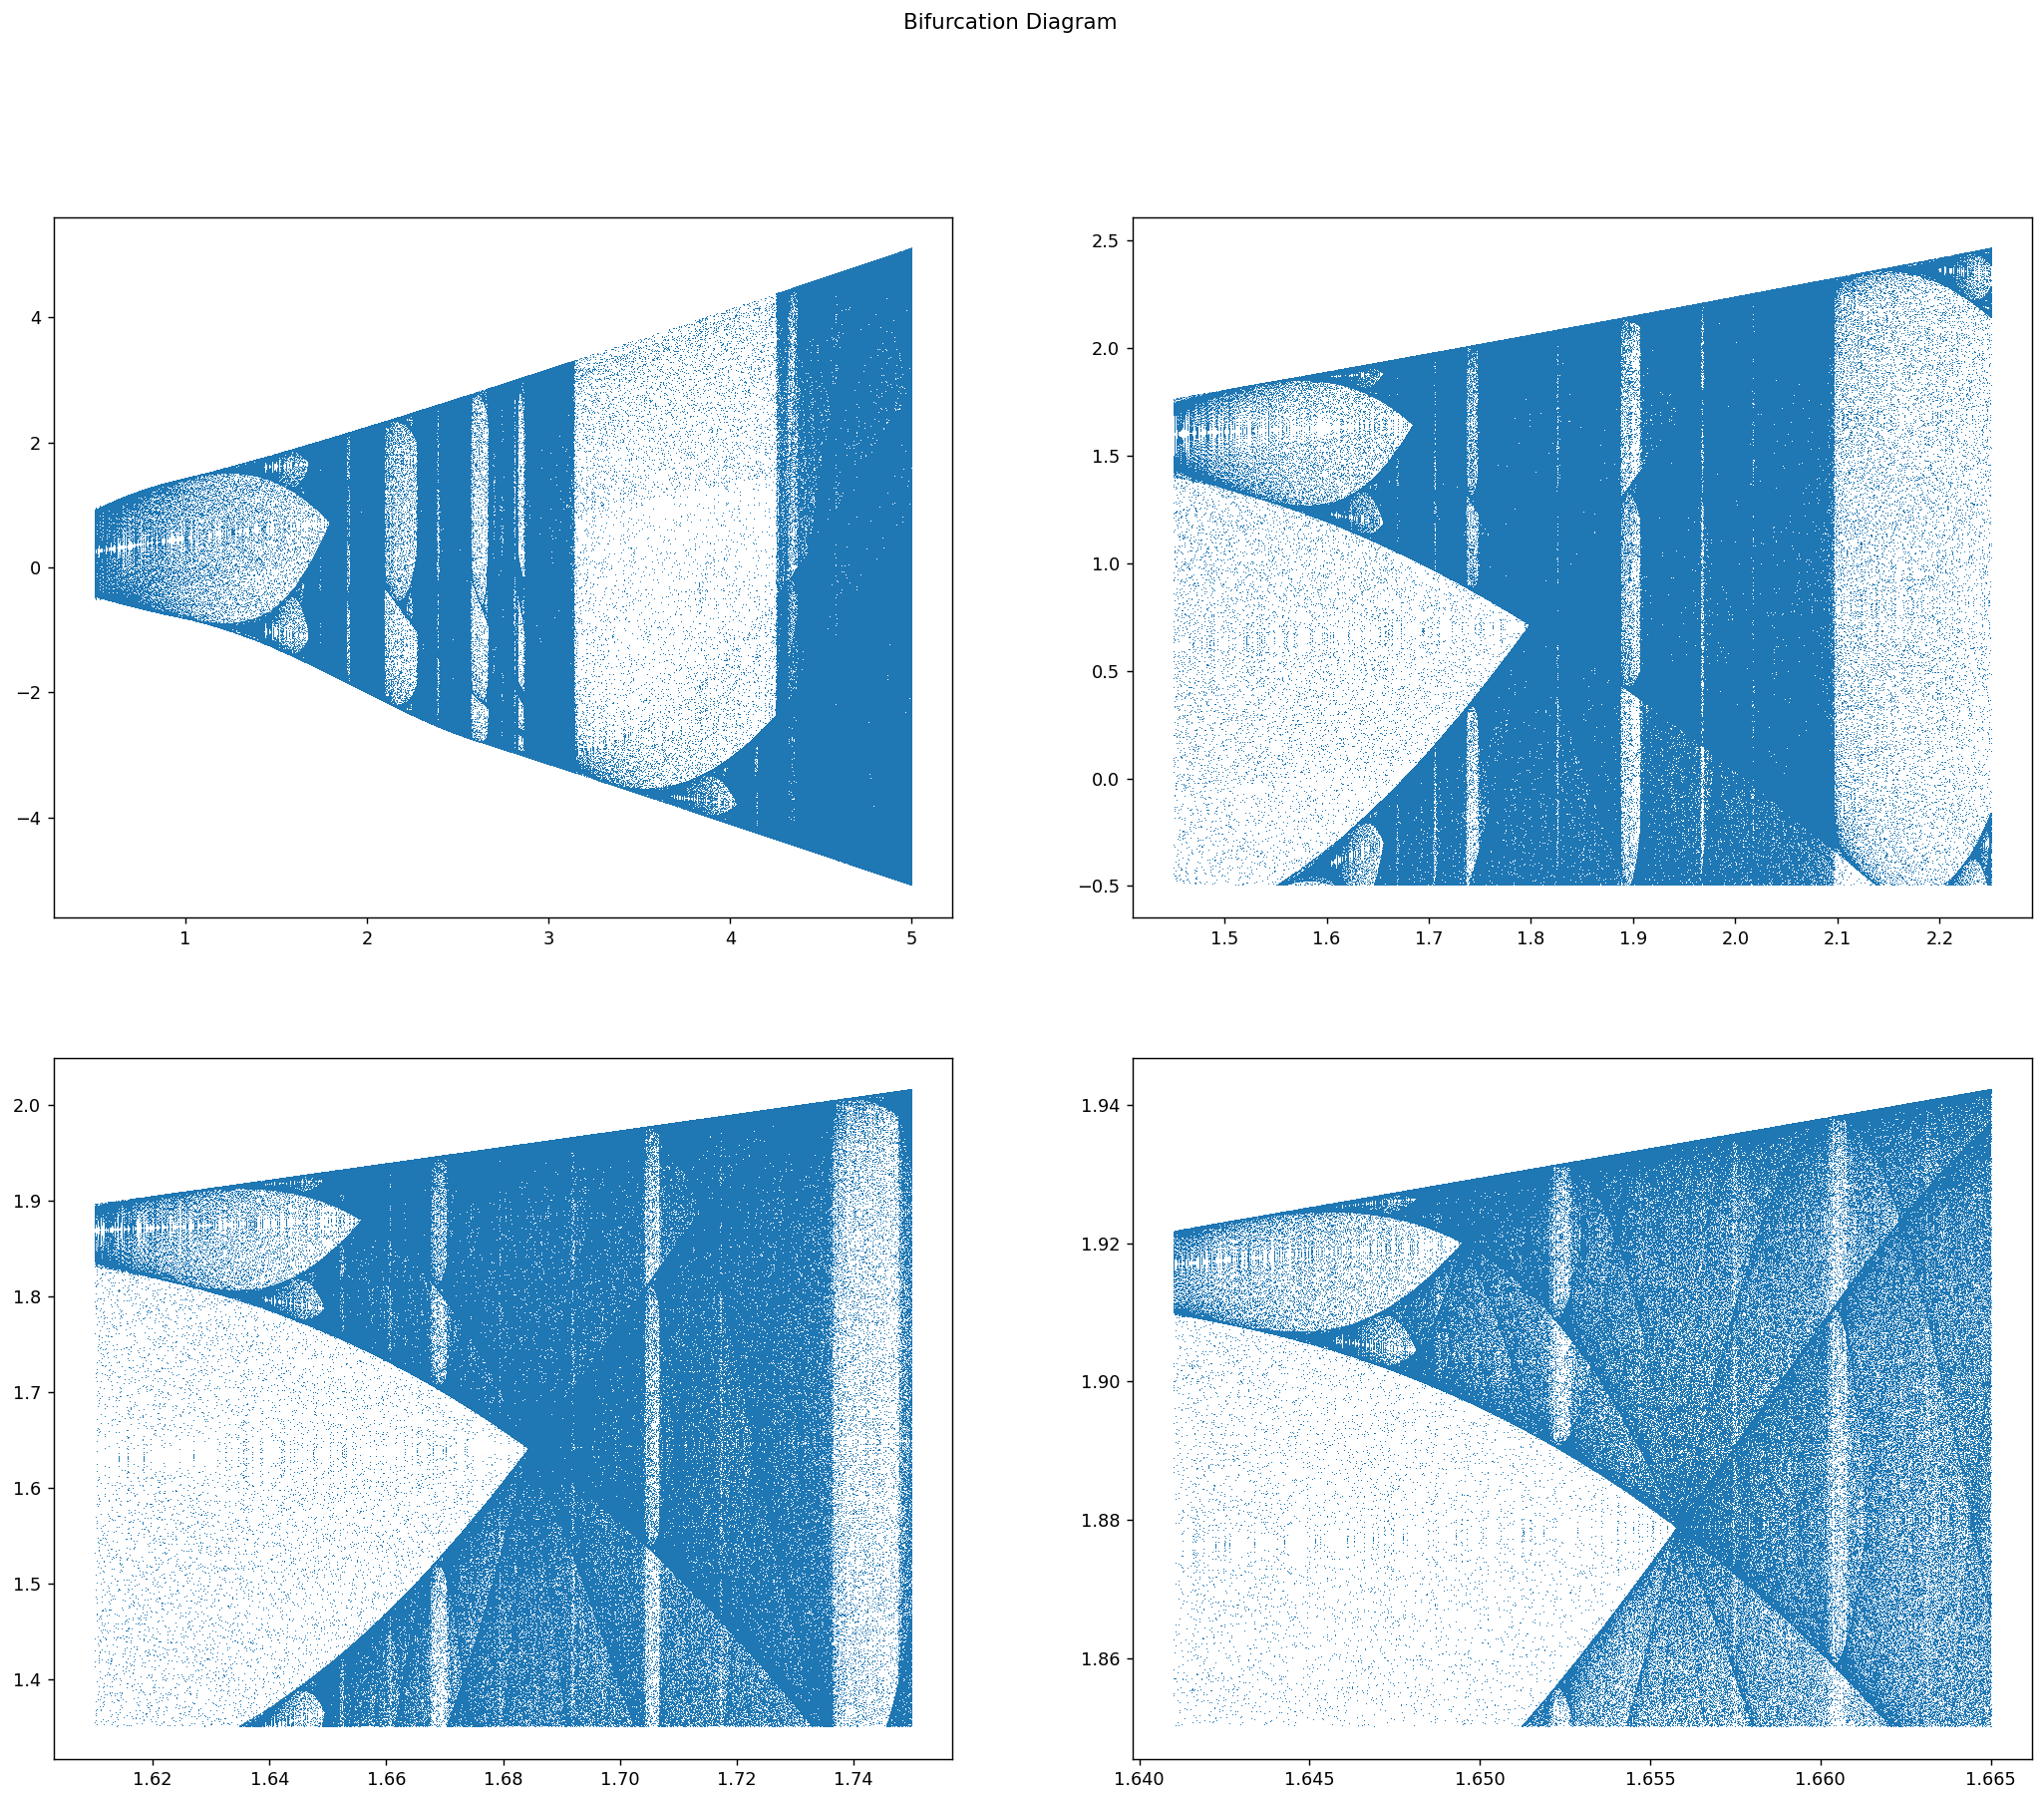

In [5]:
n_rows = 2
n_columns = 2

fig, axes = plt.subplots(n_rows,n_columns, figsize=(20,16), dpi = 128)
fig.suptitle('Bifurcation Diagram')


for row in range(n_rows):
    for column in range(n_columns):
        cropped_plot: CroppedPlot = cropped_plots[row][column]
        r_values, x_n_values = cropped_plot.get_data(iteration=500)
        axes[row,column].plot(
            r_values,
            x_n_values,
            ls = '',
            marker = ','
        )

plt.show()



# Q1c

# Q2a

In [ ]:
# Modified Lotka-Volterra
def LV_Q2a(z, t):
    # Here z is a vector such that x=z[0] and y=z[1]. 
    # This function should return [dx/dt, dy/dt]
    return [ z[0]*(a-b*z[1])-e*z[0]*z[0], z[1]*(d*z[0]-c) ]

tmax = 50  # for a short time to begin with
ticks = 20*tmax  # the total number of time points we want solutions at.
# We then initialize a time array with values at these time points.
ts = np.linspace(0, tmax, ticks)

#System Parameters
a = 1
b = 1
c = 1 
d = 1
e = 1

#initial conditions
x0 = 1
y0 = 1
z0 = [x0, y0]

#Plotting the graphs
fig, axs = plt.subplots(2, 2, sharex = True, sharey = True, figsize = (15,12))
fig.suptitle(r"Modified Lotka-Volterra")

#Subplot1
e = 0.5
zs = odeint(LV_Q2a, z0, ts)
axs[0,0].plot(ts,zs[:,0], label = 'Rabbit')
axs[0,0].plot(ts, zs[:,1], label='Fox')
axs[0,0].set_title(r"e = %.2f" % e)
axs[0,0].grid()
axs[0,0].legend()

#Subplot2
e = 1
zs = odeint(LV_Q2a, z0, ts)
axs[0,1].plot(ts,zs[:,0], label = 'Rabbit')
axs[0,1].plot(ts, zs[:,1], label='Fox')
axs[0,1].set_title(r"e = %.2f" % e)
axs[0,1].grid()
axs[0,1].legend()

#Subplot3
e = 2
zs = odeint(LV_Q2a, z0, ts)
axs[1,0].plot(ts,zs[:,0], label = 'Rabbit')
axs[1,0].plot(ts, zs[:,1], label='Fox')
axs[1,0].set_title(r"e = %.2f" % e)
axs[1,0].grid()
axs[1,0].legend()

#Subplot4
e = 3
zs = odeint(LV_Q2a, z0, ts)
axs[1,1].plot(ts,zs[:,0], label = 'Rabbit')
axs[1,1].plot(ts, zs[:,1], label='Fox')
axs[1,1].set_title(r"e = %.2f" % e)
axs[1,1].grid()
axs[1,1].legend()

plt.show()

In [ ]:
final_rabbit = []
final_fox = []
series_e =  np.linspace(0,3,60)

for i in series_e:
    e = i
    zs = odeint(LV_Q2a, z0, ts)
    final_rabbit.append(zs[:,0][-1])
    final_fox.append(zs[:,1][-1])
    
plt.figure(figsize=(10,8))
plt.xlabel(r"$e$")
plt.ylabel("Population")
plt.title("Final rabbit and fox populations")

plt.plot(series_e, final_rabbit, label='Rabbit')
plt.plot(series_e, final_fox, label='Fox')
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Q2b

In [ ]:
def LV_Q2b(z, t):
    # Here z is a vector such that x=z[0] and y=z[1]. 
    # This function should return [dx/dt, dy/dt]
    return [ z[0]*(a-b*z[1])-e*z[0]*z[0], z[1]*(d*z[0]-c) + f*z[1]*(1-z[1]) ]

a = 1
b = 1
c = 0.5
d = 0.5
e = 1
f = 0.5

tmax = 50
ticks = 20*tmax
ts = np.linspace(0, tmax, ticks)
zs = odeint(LV_Q2b, z0, ts)

plt.figure(figsize=(10,8))
plt.xlabel(r"$t$")
plt.ylabel("Ratio")
plt.title("Ratio of Foxes against Rabbits")

plt.plot(ts, zs[:,1]/zs[:,0])
# plt.plot(ts,zs[:,0], label = 'Rabbit')
# plt.plot(ts, zs[:,1], label='Fox')
# plt.legend(loc='upper left')
plt.grid()
plt.show()


# Q2c

In [ ]:
final_rabbit = []
final_fox = []
ratio = []
ticks = 100
series_f = np.linspace(0,10,ticks)
ts = np.linspace(0, 100, ticks)

a = 1
b = 1
c = 1
d = 1
e = 1
z0 = [1,1]

for i in series_f:
    f = i
    zs = odeint(LV_Q2b, z0, ts)
    final_rabbit.append(zs[:,0][-1])
    final_fox.append(zs[:,1][-1])
    ratio.append(zs[:,1][-1]/zs[:,0][-1])

plt.figure(figsize=(10,8))
plt.xlabel("f")
plt.ylabel("Population")
plt.title("Final rabbit and fox populations")

plt.plot(series_f, ratio, label='Ratio')
plt.plot(series_f, final_rabbit, label='Rabbit')
plt.plot(series_f, final_fox, label='Fox')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Fox population will truimph over rabbit population for f > 1. It is not possible for foxes to become extinct (when system parameters a,b,c,d,e = 1) as they have an final stable population > 0.

# Q2d

In [ ]:
z0 = [1,1]
tmax = 50
ticks = 20*tmax
ts = np.linspace(0, tmax, ticks)

#Set of parameters 1
a = 1
b = 1
c = 1
d = 1
e = 1
f = 1.5
zs = odeint(LV_Q2b, z0, ts)

#Set of parameters 2
a = 1
b = 0.25
c = 1
d = 0.2
e = 1
f = 0.1
zs2 = odeint(LV_Q2b, z0, ts)

plt.figure(figsize=(10,8))
plt.xlabel(r"$t$")
plt.ylabel("Ratio")
plt.title("Ratio of Foxes against Rabbits")

plt.plot(ts, zs[:,1]/zs[:,0], label = "Set 1")
plt.plot(ts, zs2[:,1]/zs2[:,0], label = "Set 2")
plt.legend(loc='upper right')
plt.grid()
plt.show()

Set 2 sees the ratio of foxes to rabbits drop to 0 when the foxes population drop to 0. This is because the foxes do not have sufficient birth rate of new foxes to combat the death rate of foxes. Meanwhile, Set 1 is the deafult case with a,b,c,d,e = 1 and f set to 1.5. This allows the foxes to have higher birth rate compared to rabbits as they are able to consume more leftover food from the farmer, allowing the stable population of foxes to be higher than rabbits